## Regra da Cadeia

Excelente! Chegamos ao tópico central que você mencionou desde o início, e que é absolutamente vital para entender o backpropagation: a **Regra da Cadeia (Chain Rule)**. 🎯

Depois de aprender a derivar funções básicas e suas combinações (soma, produto, quociente), a Regra da Cadeia nos ensina como derivar **funções compostas** – ou seja, funções que são formadas pela aplicação de uma função ao resultado de outra, como $f(g(x))$.

### 1. O que é a Regra da Cadeia?

Em cálculo, a Regra da Cadeia é uma fórmula que expressa a derivada da composição de duas ou mais funções diferenciáveis em termos das derivadas dessas funções individuais[cite: 290]. Se você tem uma função "externa" e uma função "interna", a Regra da Cadeia mostra como a variação na função interna afeta a variação na função externa.

### 2. A Regra da Cadeia para Duas Funções Compostas

Vamos considerar duas funções diferenciáveis, $f$ e $g$.

* **Notação de Lagrange:**
    Se temos uma função $h(x)$ que é a composição de $f$ e $g$, ou seja, $h(x) = f(g(x))$, então a derivada de $h(x)$ é:
    $$h'(x) = f'(g(x)) \cdot g'(x)$$
    Isso significa:
    1.  Derive a função externa $f$, mas mantenha a função interna $g(x)$ como seu argumento: $f'(g(x))$.
    2.  Multiplique o resultado pela derivada da função interna $g'(x)$.

    Equivalentemente, pode ser escrita como $(f \circ g)' = (f' \circ g) \cdot g'$[cite: 291].

* **Notação de Leibniz:**
    Esta notação é muitas vezes mais intuitiva para a Regra da Cadeia. Se uma variável $z$ depende da variável $y$, e $y$ por sua vez depende da variável $x$ (ou seja, $z = f(y)$ e $y = g(x)$), então $z$ também depende de $x$ através da variável intermediária $y$[cite: 293]. A Regra da Cadeia é expressa como[cite: 292, 294]:
    $$\frac{dz}{dx} = \frac{dz}{dy} \cdot \frac{dy}{dx}$$
    Parece que os "dy" se cancelam, o que ajuda a lembrar a fórmula, embora seja uma simplificação de notação. É crucial entender que $\frac{dz}{dy}$ é avaliada em $y(x)$[cite: 294].

* **Intuição:**
    A intuição da Regra da Cadeia afirma que conhecer a taxa de variação instantânea de $z$ em relação a $y$ e a de $y$ em relação a $x$ permite calcular a taxa de variação instantânea de $z$ em relação a $x$ como o produto das duas taxas de variação[cite: 296].
    George F. Simmons exemplifica: "Se um carro viaja duas vezes mais rápido que uma bicicleta e a bicicleta é quatro times mais rápida que um homem andando, então o carro viaja $2 \times 4 = 8$ vezes mais rápido que o homem."[cite: 297]. Se $z$, $y$, e $x$ são as posições (variáveis) do carro, da bicicleta e do homem, respectivamente, a taxa de variação das posições relativas são as derivadas[cite: 298, 299].

### 3. Exemplo Prático com Python e SymPy

Vamos usar a função $h(x) = \sin(x^2)$.
Aqui, podemos identificar:
* Função interna: $g(x) = x^2$
* Função externa: $f(u) = \sin(u)$ (onde $u = g(x)$)

Então, $h(x) = f(g(x))$.

1.  **Derivadas das funções individuais:**
    * $g'(x) = \frac{d}{dx}(x^2) = 2x$
    * $f'(u) = \frac{d}{du}(\sin u) = \cos u$

2.  **Aplicando a Regra da Cadeia $h'(x) = f'(g(x)) \cdot g'(x)$:**
    * $f'(g(x))$: Substitua $u$ por $g(x)$ em $f'(u)$. Então, $f'(g(x)) = \cos(x^2)$.
    * $h'(x) = \cos(x^2) \cdot (2x) = 2x \cos(x^2)$.

Vamos verificar com SymPy:

```python
import sympy

x_sym = sympy.symbols('x')

# Função interna
g_x = x_sym**2
# Função externa (usando u_sym para representar a saída de g_x)
u_sym = sympy.symbols('u')
f_u = sympy.sin(u_sym)

# Função composta h(x) = f(g(x))
h_x = f_u.subs(u_sym, g_x) # Substitui u por g_x em f_u
print(f"Função Composta h(x) = f(g(x)): {h_x}") # Saída: sin(x**2)

# Derivadas individuais
g_prime_x = sympy.diff(g_x, x_sym)
print(f"g'(x): {g_prime_x}") # Saída: 2*x

f_prime_u = sympy.diff(f_u, u_sym)
print(f"f'(u): {f_prime_u}") # Saída: cos(u)

# Aplicando a Regra da Cadeia: f'(g(x)) * g'(x)
# f'(g(x)) é f_prime_u com u substituído por g_x
f_prime_g_x = f_prime_u.subs(u_sym, g_x)
print(f"f'(g(x)): {f_prime_g_x}") # Saída: cos(x**2)

h_prime_x_manual = f_prime_g_x * g_prime_x
print(f"h'(x) pela Regra da Cadeia (manual): {h_prime_x_manual}") # Saída: 2*x*cos(x**2)

# Verificando com a derivação direta da função composta por SymPy
h_prime_x_sympy = sympy.diff(h_x, x_sym)
print(f"h'(x) diretamente por SymPy: {h_prime_x_sympy}") # Saída: 2*x*cos(x**2)

assert h_prime_x_manual == h_prime_x_sympy
print("Resultados coincidem!")
```

### 4. Regra da Cadeia para Múltiplas Funções Compostas

A Regra da Cadeia pode ser aplicada a composições de mais de duas funções[cite: 312]. Se você tem $y = f(g(h(x)))$, você pode pensar nisso como $f(u)$ onde $u = g(v)$ e $v = h(x)$.
A derivada se torna um produto de múltiplas derivadas.
Em notação de Leibniz, isso fica muito intuitivo:
$$\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dv} \cdot \frac{dv}{dx}$$

**Exemplo:** $y = e^{\sin(x^2)}$ [cite: 314]
Podemos decompor em três funções[cite: 314]:
1.  $v = h(x) = x^2$  => $\frac{dv}{dx} = 2x$
2.  $u = g(v) = \sin(v)$ => $\frac{du}{dv} = \cos(v)$
3.  $y = f(u) = e^u$ => $\frac{dy}{du} = e^u$

Aplicando a Regra da Cadeia[cite: 316]:
$\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dv} \cdot \frac{dv}{dx}$
$\frac{dy}{dx} = (e^u) \cdot (\cos v) \cdot (2x)$
Substituindo $u$ e $v$ de volta em termos de $x$:
$u = \sin(v) = \sin(x^2)$
$v = x^2$
$\frac{dy}{dx} = e^{\sin(x^2)} \cdot \cos(x^2) \cdot 2x$

**Com SymPy:**
```python
import sympy
x_sym = sympy.symbols('x')

# y = e^(sin(x^2))
h_x_inner = x_sym**2
g_v_middle = sympy.sin(h_x_inner) # g(h(x))
f_u_outer = sympy.exp(g_v_middle)  # f(g(h(x)))

print(f"Função y = e^(sin(x^2)): {f_u_outer}")

# Derivada direta com SymPy
dy_dx_sympy = sympy.diff(f_u_outer, x_sym)
print(f"dy/dx por SymPy: {dy_dx_sympy}")
# Saída esperada: 2*x*exp(sin(x**2))*cos(x**2)
```

### 5. Por que a Regra da Cadeia é Crucial para o Backpropagation?

Em uma rede neural, a saída final (e, consequentemente, o erro ou a função de perda) é o resultado de uma longa cadeia de operações (funções) aplicadas sequencialmente através das camadas: transformações lineares, funções de ativação, etc. Cada camada adiciona uma nova função à composição.

O backpropagation precisa calcular como uma pequena mudança em um peso ou bias em uma camada inicial afetaria o erro final. Isso é exatamente o que a derivada nos diz! Para calcular essa derivada (o gradiente da função de perda em relação aos pesos), o backpropagation aplica a Regra da Cadeia repetidamente, propagando o gradiente do erro da camada de saída de volta para as camadas internas.

A Regra da Cadeia permite decompor esse cálculo complexo da derivada total em uma série de cálculos de derivadas locais mais simples (a derivada de cada função de ativação, a derivada da transformação linear, etc.) e multiplicá-los. O "Chain_rule.pdf" afirma que a Regra da Cadeia forma a base do algoritmo de backpropagation usado na descida do gradiente de redes neurais em aprendizado profundo[cite: 335].

Entender a Regra da Cadeia é, portanto, entender o mecanismo matemático fundamental que permite que as redes neurais aprendam eficientemente.

Com este entendimento, você está muito bem posicionado para mergulhar nos próximos tópicos, como derivadas parciais e o gradiente, que generalizam esses conceitos para funções de múltiplas variáveis – o cenário real das redes neurais.

### Exemplo 

Claro! Vamos construir um exemplo em Python passo a passo para aplicar a Regra da Cadeia.

Vamos usar uma função composta relativamente simples para que possamos acompanhar cada etapa:
Seja a função $h(x) = (2x + 1)^3$.

Podemos decompor $h(x)$ em:
1.  Uma função interna: $u = g(x) = 2x + 1$
2.  Uma função externa: $y = f(u) = u^3$

Assim, $h(x) = f(g(x))$.

Para aplicar a Regra da Cadeia, $\frac{dh}{dx} = \frac{df}{du} \cdot \frac{du}{dx}$ (ou $h'(x) = f'(g(x)) \cdot g'(x)$), precisamos das derivadas de $f(u)$ e $g(x)$:

* $\frac{du}{dx} = g'(x) = \frac{d}{dx}(2x + 1) = 2$
* $\frac{df}{du} = f'(u) = \frac{d}{du}(u^3) = 3u^2$


**Como o código aplica a Regra da Cadeia:**

1.  **`g(x)` e `dg_dx(x)`:** Definimos a função interna ($2x+1$) e sua derivada ($2$).
2.  **`f(u)` e `df_du(u)`:** Definimos a função externa ($u^3$) e sua derivada ($3u^2$).
3.  **`dh_dx_via_regra_da_cadeia(x_valor)`:**
    * `u_valor = g(x_valor)`: Calcula o valor da função interna no ponto `x_valor`. Este é o valor que será "alimentado" na derivada da função externa.
    * `df_du_em_gx = df_du(u_valor)`: Calcula $f'(u)$ usando `u_valor` (que é $g(x_{valor})$). Isso nos dá $f'(g(x))$.
    * `dg_dx_em_x = dg_dx(x_valor)`: Calcula $g'(x)$ no ponto `x_valor`.
    * `h_prime_x = df_du_em_gx * dg_dx_em_x`: Multiplica os dois resultados, aplicando a fórmula $f'(g(x)) \cdot g'(x)$.

Os `print` statements no código ajudam a seguir cada etapa do cálculo. A verificação com `sympy` no final confirma que nossa implementação manual da regra da cadeia está correta.

Este exemplo mostra como você pode "montar" a derivada de uma função composta usando as derivadas de suas partes constituintes, que é a essência da Regra da Cadeia.

In [1]:
import numpy as np # Usaremos para futuras operações, embora não estritamente necessário para este exemplo simples

# 1. Definir as funções individuais e suas derivadas (analíticas)

def g(x):
    """Função interna: u = 2x + 1"""
    print(f"    Calculando g({x}) = 2*{x} + 1 = {2*x + 1}")
    return 2 * x + 1

def dg_dx(x):
    """Derivada da função interna: du/dx = g'(x)"""
    # A derivada de 2x + 1 é 2
    print(f"    Calculando dg_dx({x}) = 2")
    # Usamos np.full_like para o caso de x ser um array, retornando um array de 2s.
    # Para um escalar, poderia ser simplesmente 'return 2.0'
    if isinstance(x, (np.ndarray, list)):
        return np.full_like(np.asarray(x, dtype=float), 2.0)
    return 2.0

def f(u):
    """Função externa: y = u^3"""
    print(f"    Calculando f({u}) = {u}^3 = {u**3}")
    return u**3

def df_du(u):
    """Derivada da função externa: dy/du = f'(u)"""
    # A derivada de u^3 é 3u^2
    print(f"    Calculando df_du({u}) = 3*({u})^2 = {3 * u**2}")
    return 3 * u**2

# 2. Definir a função composta h(x) = f(g(x)) para referência
def h(x):
    """Função composta h(x) = f(g(x))"""
    return f(g(x))

# 3. Aplicar a Regra da Cadeia para encontrar h'(x)
def dh_dx_via_regra_da_cadeia(x_valor):
    """
    Calcula a derivada de h(x) = f(g(x)) em x_valor usando a Regra da Cadeia.
    h'(x) = f'(g(x)) * g'(x)
    """
    print(f"\nAplicando a Regra da Cadeia para x = {x_valor}:")

    # Passo 1: Calcular g(x) (o valor da função interna)
    u_valor = g(x_valor) # Este é o 'u' que será usado em f'(u)

    # Passo 2: Calcular f'(g(x)), que é df_du avaliada em u_valor = g(x_valor)
    df_du_em_gx = df_du(u_valor)

    # Passo 3: Calcular g'(x)
    dg_dx_em_x = dg_dx(x_valor)

    # Passo 4: Multiplicar os resultados (Regra da Cadeia)
    h_prime_x = df_du_em_gx * dg_dx_em_x

    print(f"  Resultado da Regra da Cadeia h'({x_valor}) = f'(g({x_valor})) * g'({x_valor}) = {df_du_em_gx} * {dg_dx_em_x} = {h_prime_x}")
    return h_prime_x

# 4. Testar com um valor específico
x_teste = 2
derivada_h_em_x_teste = dh_dx_via_regra_da_cadeia(x_teste)

print(f"\nO valor da função composta h({x_teste}) é: {h(x_teste)}") # (2*2+1)^3 = 5^3 = 125
print(f"A derivada calculada de h(x) em x={x_teste} é: {derivada_h_em_x_teste}") # Esperado: 6*(2*2+1)^2 = 6*5^2 = 6*25 = 150

# 5. Verificação com SymPy (para confirmar nosso cálculo manual/programático)
import sympy

x_sym = sympy.symbols('x')
h_simbolico = (2 * x_sym + 1)**3

# Derivada de h(x) diretamente com SymPy
dh_dx_simbolico = sympy.diff(h_simbolico, x_sym)

# Valor da derivada simbólica em x_teste
dh_dx_simbolico_em_x_teste = dh_dx_simbolico.subs(x_sym, x_teste)

print("\n--- Verificação com SymPy ---")
print(f"h(x) simbólico = {h_simbolico}")
print(f"h'(x) simbólico = {dh_dx_simbolico}") # Esperado: 6*(2*x + 1)**2
print(f"h'({x_teste}) simbólico = {dh_dx_simbolico_em_x_teste}")

assert np.isclose(float(derivada_h_em_x_teste), float(dh_dx_simbolico_em_x_teste))
print("Cálculo pela Regra da Cadeia em Python e verificação com SymPy coincidem!")


Aplicando a Regra da Cadeia para x = 2:
    Calculando g(2) = 2*2 + 1 = 5
    Calculando df_du(5) = 3*(5)^2 = 75
    Calculando dg_dx(2) = 2
  Resultado da Regra da Cadeia h'(2) = f'(g(2)) * g'(2) = 75 * 2.0 = 150.0
    Calculando g(2) = 2*2 + 1 = 5
    Calculando f(5) = 5^3 = 125

O valor da função composta h(2) é: 125
A derivada calculada de h(x) em x=2 é: 150.0

--- Verificação com SymPy ---
h(x) simbólico = (2*x + 1)**3
h'(x) simbólico = 6*(2*x + 1)**2
h'(2) simbólico = 150
Cálculo pela Regra da Cadeia em Python e verificação com SymPy coincidem!


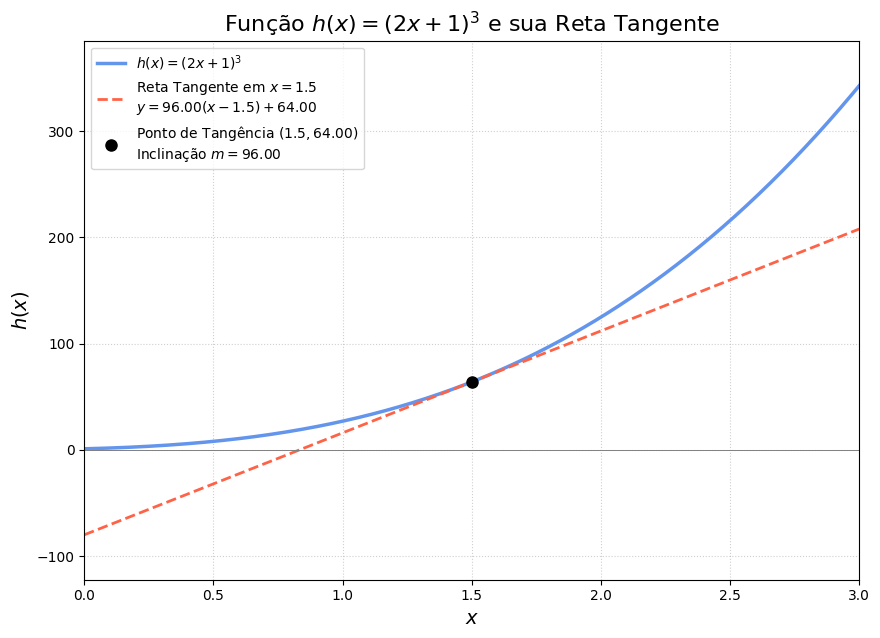

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Definir a função original h(x) = (2x + 1)^3
def h_func(x):
    """Calcula h(x) = (2x + 1)^3."""
    return (2 * x + 1)**3

# 2. Definir a derivada h'(x) = 6*(2x + 1)^2, obtida pela Regra da Cadeia
def h_prime_func(x):
    """Calcula h'(x) = 6*(2x + 1)^2 (derivada de h_func)."""
    return 6 * (2 * x + 1)**2

# 3. Escolher um ponto x_0 para encontrar a tangente
x0 = 0.5  # Você pode experimentar outros valores, como -1, 0, 1, etc.

# 4. Calcular o valor da função e da derivada no ponto x_0
y0 = h_func(x0)          # h(x_0)
m_tangente = h_prime_func(x0) # h'(x_0), inclinação da tangente

# 5. Gerar valores de x para o gráfico
# Criar um intervalo em torno de x0 para uma boa visualização
x_vals = np.linspace(x0 - 1.5, x0 + 1.5, 400)

# Calcular os valores y da função h(x) para o plot
y_h_vals = h_func(x_vals)

# Calcular os valores y da reta tangente
# Equação da reta tangente: y_tangente = y0 + m_tangente * (x - x0)
y_tangente_vals = y0 + m_tangente * (x_vals - x0)

# 6. Criar o gráfico
plt.figure(figsize=(10, 7))

# Plotar a função h(x)
plt.plot(x_vals, y_h_vals, label="$h(x) = (2x + 1)^3$", color="cornflowerblue", linewidth=2.5)

# Plotar a reta tangente
plt.plot(x_vals, y_tangente_vals, label=f"Reta Tangente em $x={x0}$\n$y = {m_tangente:.2f}(x - {x0}) + {y0:.2f}$", color="tomato", linestyle="--", linewidth=2)

# Marcar o ponto de tangência (x0, y0)
plt.plot(x0, y0, 'o', color="black", markersize=8,
         label=f"Ponto de Tangência $({x0}, {y0:.2f})$\nInclinação $m = {m_tangente:.2f}$")

# Configurações do gráfico para uma apresentação elegante
plt.title(f"Função $h(x)=(2x+1)^3$ e sua Reta Tangente", fontsize=16)
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$h(x)$", fontsize=14)
plt.axhline(0, color='gray', linewidth=0.7, linestyle='-')
plt.axvline(0, color='gray', linewidth=0.7, linestyle='-')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(fontsize=10, loc='upper left')

# Ajustar os limites dos eixos para focar na região de interesse
y_min_plot = min(y_h_vals.min(), y_tangente_vals.min())
y_max_plot = max(y_h_vals.max(), y_tangente_vals.max())
padding_y = (y_max_plot - y_min_plot) * 0.1 # Adicionar um pouco de espaço
plt.ylim(y_min_plot - padding_y, y_max_plot + padding_y)
plt.xlim(x_vals.min(), x_vals.max())

plt.show()

---

### Exemplo 2

Ótima ideia! Aplicar a Regra da Cadeia a um problema mais "palpável" ajuda muito a entender o que está acontecendo e por que ela é útil.

**Problema Proposto: A Área de um Círculo em Expansão**

Imagine uma mancha de óleo circular que está se espalhando sobre a superfície da água. O raio dessa mancha circular não é constante, mas aumenta com o tempo.

* O **raio** $r$ da mancha de óleo (em metros) aumenta de acordo com a função: $r(t) = 1 + 0.2t$, onde $t$ é o tempo em segundos. (Começa com 1 metro de raio e aumenta 0.2 metros por segundo).
* A **área** $A$ de um círculo é dada pela fórmula: $A(r) = \pi r^2$.

Nós queremos saber: **Qual é a taxa de variação da área da mancha de óleo em relação ao tempo ($\frac{dA}{dt}$) em um instante específico, por exemplo, quando $t = 5$ segundos?**

Aqui, a área $A$ depende do raio $r$, e o raio $r$ depende do tempo $t$. Portanto, a área $A$ também depende do tempo $t$, através do raio. Esta é uma situação perfeita para a Regra da Cadeia!

$A \xrightarrow{\text{depende de}} r \xrightarrow{\text{depende de}} t$

Pela Regra da Cadeia:
$$\frac{dA}{dt} = \frac{dA}{dr} \cdot \frac{dr}{dt}$$

**Passos:**

1.  **Identificar as funções e suas derivadas:**
    * Função interna (raio em função do tempo): $r(t) = 1 + 0.2t$
        * Derivada: $\frac{dr}{dt} = 0.2$ (A taxa com que o raio aumenta, em m/s)
    * Função externa (área em função do raio): $A(r) = \pi r^2$
        * Derivada: $\frac{dA}{dr} = 2\pi r$ (Como a área muda se o raio muda um pouquinho)

2.  **Aplicar a Regra da Cadeia:**
    $\frac{dA}{dt} = (2\pi r) \cdot (0.2)$
    Como $r = 1 + 0.2t$, substituímos $r$ na expressão:
    $\frac{dA}{dt} = 2\pi (1 + 0.2t) \cdot 0.2 = 0.4\pi (1 + 0.2t)$

3.  **Calcular para $t = 5$ segundos:**
    * Primeiro, o raio em $t=5$: $r(5) = 1 + 0.2 \times 5 = 1 + 1 = 2$ metros.
    * Agora, $\frac{dA}{dt}$ em $t=5$:
        $\frac{dA}{dt}\Big|_{t=5} = 0.4\pi (1 + 0.2 \times 5) = 0.4\pi (1 + 1) = 0.4\pi \times 2 = 0.8\pi$ metros quadrados por segundo.
        $0.8\pi \approx 0.8 \times 3.14159 \approx 2.513$ m²/s.


**Detalhes do Entendimento:**

* **O Problema:** Temos uma situação onde uma quantidade (Área) depende de outra (Raio), que por sua vez depende de uma terceira (Tempo).
* **$\frac{dr}{dt} = 0.2$ m/s:** Isso nos diz que a cada segundo que passa, o raio da mancha de óleo aumenta em 0.2 metros. É uma taxa de variação constante.
* **$\frac{dA}{dr} = 2\pi r$ m²/m:** Isso nos diz que, para um dado raio $r$, se o raio aumentasse *um pouquinho* (digamos, $\Delta r$), a área aumentaria aproximadamente $2\pi r \cdot \Delta r$. Note que esta taxa depende do raio atual $r$: quanto maior o raio, mais a área aumenta para uma mesma pequena variação no raio.
    * Em $t=5$s, $r=2$m. Então $\frac{dA}{dr} = 2\pi (2) = 4\pi \approx 12.56$ m²/m. Isso significa que, *neste instante*, se o raio aumentasse 1 metro, a área aumentaria aproximadamente 12.56 m² (esta é uma aproximação linear).
* **$\frac{dA}{dt} = \frac{dA}{dr} \cdot \frac{dr}{dt}$:** A Regra da Cadeia combina essas duas taxas.
    * No instante $t=5$s (onde $r=2$m):
        $\frac{dA}{dt} = (4\pi \text{ m}^2/\text{m}) \cdot (0.2 \text{ m/s}) = 0.8\pi \text{ m}^2/\text{s} \approx 2.513 \text{ m}^2/\text{s}$.
    * **Interpretação:** No instante em que o tempo é 5 segundos (e o raio é 2 metros), a área da mancha de óleo está aumentando a uma taxa de aproximadamente 2.513 metros quadrados por segundo.
        A "sensibilidade" da área à mudança do raio ($4\pi$) é multiplicada pela "sensibilidade" do raio à mudança do tempo ($0.2$).

**O Gráfico:**

* A curva azul mostra como a área $A(t)$ aumenta com o tempo. Note que ela não é uma linha reta; a área cresce cada vez mais rápido porque o raio está aumentando e a área depende do quadrado do raio.
* O ponto vermelho marca o instante $t=5$s e a área correspondente.
* A linha tracejada laranja é a **reta tangente** à curva de $A(t)$ no ponto $t=5$s. A **inclinação desta reta tangente é exatamente $\frac{dA}{dt} \approx 2.513$ m²/s**, que calculamos usando a Regra da Cadeia. Ela representa a taxa instantânea de crescimento da área naquele momento.

Este exemplo ilustra como a Regra da Cadeia nos permite calcular a taxa de variação de uma quantidade que depende de outra variável através de uma ou mais variáveis intermediárias.

--- Análise em t = 5 segundos ---
Raio r(5) = 2.00 m
Taxa de variação do raio dr/dt(5) = 0.20 m/s
Derivada da Área em relação ao Raio dA/dr(r=2.00) = 12.57 m²/m (ou m)
Área A(5) = 12.57 m²
Taxa de variação da Área dA/dt(5) (Regra da Cadeia) = 2.513 m²/s (ou 0.80π m²/s)

--- Verificação com SymPy ---
Função A(t) simbólica: pi*(0.2*t + 1)**2
Derivada dA/dt simbólica direta: pi*(0.08*t + 0.4)
dA/dt(5) simbólico = 2.513
Cálculo pela Regra da Cadeia e verificação com SymPy coincidem!


<>:88: SyntaxWarning: invalid escape sequence '\p'
<>:88: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_316975/2202170170.py:88: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(t_vals_plot, A_vals_plot, label='$A(t) = \pi (1 + 0.2t)^2$ (Área vs. Tempo)', color='royalblue', linewidth=2)


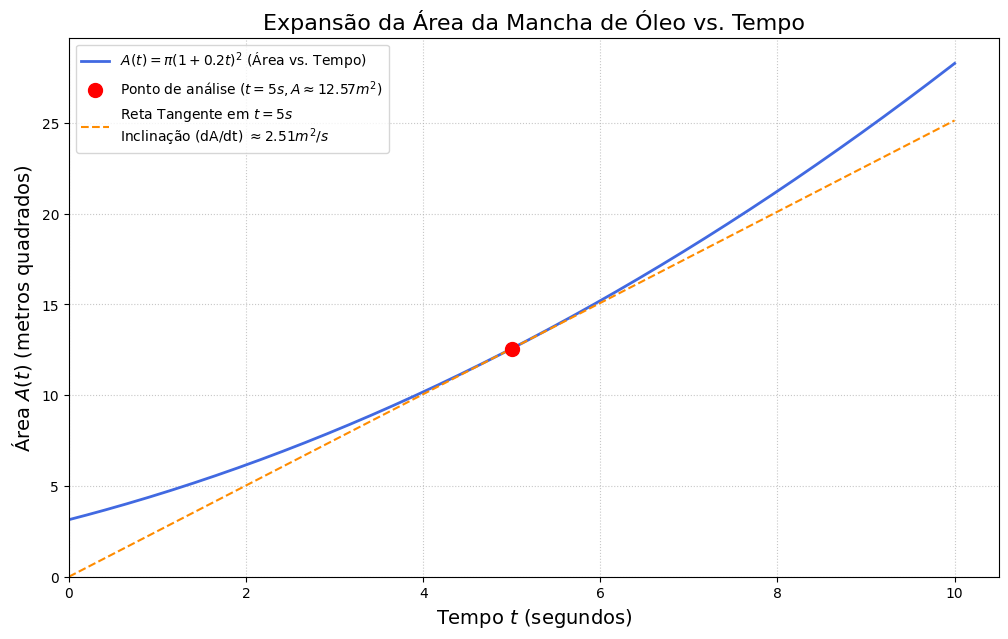

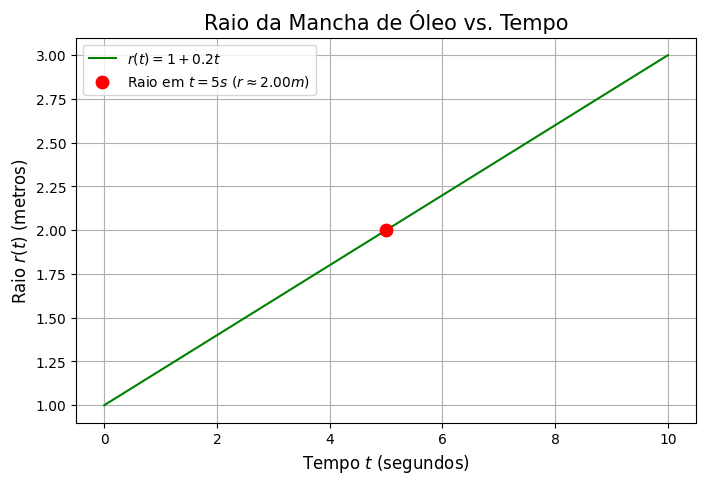

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

# --- 1. Definição das Funções e Suas Derivadas (Analíticas) ---

# Função interna: Raio em função do tempo
def r_de_t(t):
    """Raio r(t) = 1 + 0.2t"""
    return 1 + 0.2 * t

def dr_dt(t):
    """Derivada do raio em relação ao tempo: dr/dt = 0.2"""
    if isinstance(t, (np.ndarray, list)):
        return np.full_like(np.asarray(t, dtype=float), 0.2)
    return 0.2

# Função externa: Área em função do raio
def A_de_r(r_val):
    """Área A(r) = pi * r^2"""
    return np.pi * r_val**2

def dA_dr(r_val):
    """Derivada da área em relação ao raio: dA/dr = 2 * pi * r"""
    return 2 * np.pi * r_val

# Função composta: Área em função do tempo (para plotagem da curva principal)
def A_de_t_composta(t_val):
    """Área A(t) = A(r(t))"""
    return A_de_r(r_de_t(t_val))

# --- 2. Aplicando a Regra da Cadeia ---
def dA_dt_pela_regra_da_cadeia(t_val):
    """Calcula dA/dt usando a Regra da Cadeia: dA/dr * dr/dt"""
    # Valor do raio no tempo t_val: r(t_val)
    r_no_tempo_t = r_de_t(t_val)

    # Valor de dA/dr avaliado em r(t_val)
    dA_dr_no_raio_atual = dA_dr(r_no_tempo_t)

    # Valor de dr/dt (neste caso, é constante)
    dr_dt_no_tempo_t = dr_dt(t_val)

    # Multiplica as taxas
    taxa_dA_dt = dA_dr_no_raio_atual * dr_dt_no_tempo_t
    return taxa_dA_dt

# --- 3. Cálculos para um Tempo Específico ---
t_especifico = 5  # segundos

r_em_t_especifico = r_de_t(t_especifico)
A_em_t_especifico = A_de_t_composta(t_especifico)
dA_dt_calculado = dA_dt_pela_regra_da_cadeia(t_especifico)

print(f"--- Análise em t = {t_especifico} segundos ---")
print(f"Raio r({t_especifico}) = {r_em_t_especifico:.2f} m")
print(f"Taxa de variação do raio dr/dt({t_especifico}) = {dr_dt(t_especifico):.2f} m/s")
print(f"Derivada da Área em relação ao Raio dA/dr(r={r_em_t_especifico:.2f}) = {dA_dr(r_em_t_especifico):.2f} m²/m (ou m)")
print(f"Área A({t_especifico}) = {A_em_t_especifico:.2f} m²")
print(f"Taxa de variação da Área dA/dt({t_especifico}) (Regra da Cadeia) = {dA_dt_calculado:.3f} m²/s (ou {dA_dt_calculado/np.pi:.2f}π m²/s)")

# --- 4. Verificação com SymPy (Derivada Direta da Função Composta) ---
t_sym = sympy.symbols('t')
r_sym = 1 + 0.2 * t_sym
A_sym = sympy.pi * r_sym**2

dA_dt_direto_sym = sympy.diff(A_sym, t_sym)
dA_dt_direto_val_sympy = dA_dt_direto_sym.subs(t_sym, t_especifico)

print("\n--- Verificação com SymPy ---")
print(f"Função A(t) simbólica: {A_sym}")
print(f"Derivada dA/dt simbólica direta: {dA_dt_direto_sym}")
print(f"dA/dt({t_especifico}) simbólico = {dA_dt_direto_val_sympy.evalf():.3f}")
assert np.isclose(float(dA_dt_calculado), float(dA_dt_direto_val_sympy.evalf()))
print("Cálculo pela Regra da Cadeia e verificação com SymPy coincidem!")


# --- 5. Visualização Gráfica ---
t_vals_plot = np.linspace(0, 10, 200) # Valores de tempo para o gráfico
A_vals_plot = A_de_t_composta(t_vals_plot) # Valores da área para o gráfico

# Equação da reta tangente a A(t) em t_especifico
# y_tangente = A(t_especifico) + dA/dt(t_especifico) * (t - t_especifico)
y_tangente_vals = A_em_t_especifico + dA_dt_calculado * (t_vals_plot - t_especifico)

plt.figure(figsize=(12, 7))

plt.plot(t_vals_plot, A_vals_plot, label='$A(t) = \pi (1 + 0.2t)^2$ (Área vs. Tempo)', color='royalblue', linewidth=2)
plt.scatter([t_especifico], [A_em_t_especifico], color='red', s=100, zorder=5, label=f'Ponto de análise ($t={t_especifico}s, A \\approx {A_em_t_especifico:.2f}m^2$)')
plt.plot(t_vals_plot, y_tangente_vals, '--', color='darkorange', label=f'Reta Tangente em $t={t_especifico}s$\nInclinação (dA/dt) $\\approx {dA_dt_calculado:.2f} m^2/s$')

plt.title('Expansão da Área da Mancha de Óleo vs. Tempo', fontsize=16)
plt.xlabel('Tempo $t$ (segundos)', fontsize=14)
plt.ylabel('Área $A(t)$ (metros quadrados)', fontsize=14)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle=':', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim(bottom=0) # Área não pode ser negativa
plt.xlim(left=0)   # Tempo não pode ser negativo neste contexto

plt.show()

# Gráfico opcional: Raio vs. Tempo
plt.figure(figsize=(8, 5))
plt.plot(t_vals_plot, r_de_t(t_vals_plot), label='$r(t) = 1 + 0.2t$', color='green')
plt.scatter([t_especifico], [r_em_t_especifico], color='red', s=80, zorder=5, label=f'Raio em $t={t_especifico}s$ ($r \\approx {r_em_t_especifico:.2f}m$)')
plt.title('Raio da Mancha de Óleo vs. Tempo', fontsize=15)
plt.xlabel('Tempo $t$ (segundos)', fontsize=12)
plt.ylabel('Raio $r(t)$ (metros)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()